In [31]:
# import library
import pandas
import numpy as np
import math
import matplotlib.pyplot as plt

import pymoo
from pymoo.model.problem import Problem

import pandas as pd


import joblib

import seaborn as sns

In [93]:
## amorphous와 ferrite의 비교

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

read_data1 = pd.read_csv("./result/result_0613_F111_N100_amorphous.csv")
read_data2 = pd.read_csv("./result/result_0613_F111_N300_amorphous.csv")
read_data3 = pd.read_csv("./result/result_0613_F111_N1000_amorphous.csv")
read_data4 = pd.read_csv("./result/result_0613_F111_N3000_amorphous.csv")

read_data1.head()

,Unnamed: 0,N1,w1,l1,l2,h1,per,space1,space2,space3,space4,coil_width1,coil_width2,move_z1,move_z2,offset_z1,offset_z2,V,B,Lmt,Llt,w,l,h,total_loss,copperloss_tx,copperloss_rx,copperloss,coreloss
0,21,8.0,50.0,24.0,86.0,50.0,3500.0,23.0,23.0,13.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,1644.4890,0.286258,963.271325,32.250363,99.0,169.5,98.0,238.213119,113.596897,80.922943,194.519839,43.693280
1,92,8.0,50.0,24.0,87.0,50.0,3500.0,23.0,23.0,13.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,1654.1910,0.286258,953.017205,32.469346,99.0,170.5,98.0,237.718871,113.645050,80.380542,194.025592,43.693280
2,6,8.0,50.0,23.0,95.0,59.0,3500.0,23.0,23.0,13.0,9.0,3.0,4.0,2.0,2.0,0.0,0.0,1834.7175,0.298704,882.969568,32.286090,99.0,176.5,105.0,221.970303,102.350869,69.768190,172.119059,49.851245
3,98,8.0,50.0,25.0,86.0,50.0,3500.0,23.0,23.0,16.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,1697.8500,0.274808,1021.082616,32.995110,99.0,171.5,100.0,237.053691,114.017028,81.060286,195.077314,41.976377
4,15,8.0,51.0,23.0,86.0,50.0,3500.0,23.0,23.0,13.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,1608.0000,0.292847,1042.029037,31.984487,100.0,167.5,96.0,239.793406,114.605883,80.922943,195.528826,44.264580


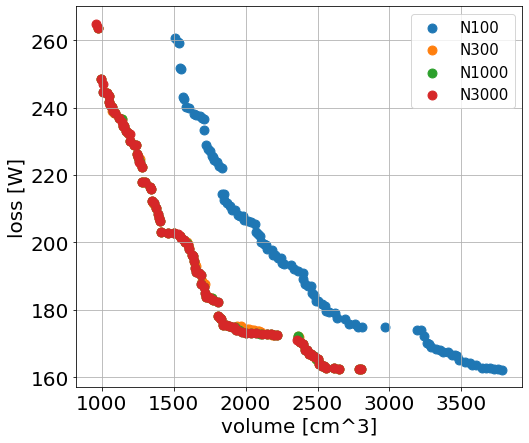

In [105]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)

plt.scatter(read_data1["V"], read_data1["total_loss"] ,s=80)
plt.scatter(read_data2["V"], read_data2["total_loss"] ,s=80)
plt.scatter(read_data3["V"], read_data3["total_loss"] ,s=80)
plt.scatter(read_data4["V"], read_data4["total_loss"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["N100","N300","N1000","N3000"], fontsize=15)

In [99]:
gen100 = pd.DataFrame(100*np.ones((100,1)), columns=["gen"])
gen300 = pd.DataFrame(300*np.ones((100,1)), columns=["gen"])
gen1000 = pd.DataFrame(1000*np.ones((100,1)), columns=["gen"])
gen3000 = pd.DataFrame(3000*np.ones((100,1)), columns=["gen"])

new_data1 = pandas.concat([gen100, read_data1],axis=1)
new_data2 = pandas.concat([gen300, read_data2],axis=1)
new_data3 = pandas.concat([gen1000, read_data3],axis=1)

new_data = pandas.concat([new_data1,new_data2,new_data3])



plt.subplot(1, 3, 1)
sns.histplot(new_data1["N1"])
plt.subplot(1, 3, 2)
sns.histplot(new_data2["N1"])
plt.subplot(1, 3, 3)
sns.histplot(new_data3["N1"])


TypeError: concat() got an unexpected keyword argument 's'

Text(0, 0.5, 'total loss[W]')

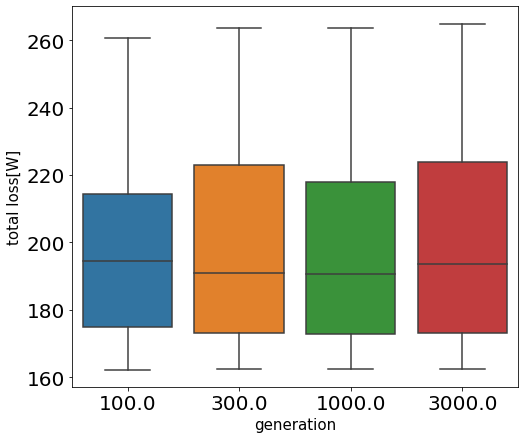

In [98]:
gen100 = pd.DataFrame(100*np.ones((100,1)), columns=["gen"])
gen300 = pd.DataFrame(300*np.ones((100,1)), columns=["gen"])
gen1000 = pd.DataFrame(1000*np.ones((100,1)), columns=["gen"])
gen3000 = pd.DataFrame(3000*np.ones((100,1)), columns=["gen"])

new_data1 = pandas.concat([gen100, read_data1],axis=1)
new_data2 = pandas.concat([gen300, read_data2],axis=1)
new_data3 = pandas.concat([gen1000, read_data3],axis=1)
new_data4 = pandas.concat([gen3000, read_data4],axis=1)

new_data = pandas.concat([new_data1,new_data2,new_data3,new_data4])

sns.boxplot(x="gen",y="total_loss",data=new_data)
#sns.boxplot(y="N1",data=read_data2)
plt.xlabel("generation", fontsize=15)
plt.ylabel("total loss[W]", fontsize=15)

